#Problem 1.1 - 1.4

In [24]:
import numpy as np
from scipy.linalg import fractional_matrix_power

# Problem 1.1
initial_labels = np.matrix([0, 0, 0, -1, -1, 1]).T
print("Given, V4, V5 have Label 2 and V6 as Label 1")
print("Let's denote the initial label vector as P0, Initial Label Vector P0:")
print(initial_labels)

# Problem 1.2
print('Taking reference from Class Lecture slide- Let S be the similarity matrix S=[Si,j]nxn')
print('Let D be a diagonal matrix where Di = summation of j Si,j')
print('Lets Compute normalized similarity matrix S’=D^{-1/2}.S.D^{-1/2}')

def compute_similarity_matrix(adjacency_matrix):
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    degree_matrix_neg_half = fractional_matrix_power(degree_matrix, -0.5)
    similarity_matrix = np.round(
        np.matmul(np.matmul(degree_matrix_neg_half, adjacency_matrix), degree_matrix_neg_half),
        3
    )
    return similarity_matrix

graph_adjacency_matrix = np.array([[0, 1, 0, 0, 1, 1],
                                   [1, 0, 1, 1, 0, 0],
                                   [0, 1, 0, 1, 0, 0],
                                   [0, 1, 1, 0, 0, 0],
                                   [1, 0, 0, 0, 0, 0],
                                   [1, 0, 0, 0, 0, 0]])

similarity_matrix_norm = compute_similarity_matrix(graph_adjacency_matrix)
print('\nNormalized Similarity Matrix (S_norm):\n')
print(similarity_matrix_norm)
print('Given alpha = 0.8')
alpha = 0.8

# Problem 1.2
print('Let Y be the initial assignment of node labels')
print('• Yi = 1 when the i-th node is assigned to the positive class  ')
print('• Yi = -1 when the i-th node is assigned to the negative class')
print('• Yi = 0 when the i-th node is unlabeled')
print('• Let F be the predicted node labels')
print('• The i-th node is unassigned if Fi =0, 0 is the threshold boundary here ')
print('• The i-th node is assigned to the positive class if Fi >0')
print('• The i-th node is assigned to the negative class if Fi < 0')

print('Applying 1st propagation P(1) = (1-a)Y + aSP(0)')
print('P1= (1-a)Y + aSY')
iteration_1_labels = (1 - alpha) * initial_labels + alpha * np.matmul(similarity_matrix_norm, initial_labels)
print('\nAfter 1 Iteration (P1):\n')
print(np.round(iteration_1_labels, 3))
[l1, l2, l3] = np.concatenate(iteration_1_labels[:3])
label_status_1 = np.where(iteration_1_labels > 0, "Positive", np.where(iteration_1_labels < 0, "Negative", "Unlabeled"))
print(f'l1 = {l1}, l2 = {l2}, l3 = {l3}, Labels: {label_status_1[:3]}')

# Problem 1.3
print('\n')
print('P2 = (1-a)Y + aSP1')
iteration_2_labels = (1 - alpha) * iteration_1_labels + alpha * np.matmul(similarity_matrix_norm, iteration_1_labels)
print('\nAfter 2 Iterations (P2):\n')
print(np.round(iteration_2_labels, 3))
[l1, l2, l3] = np.concatenate(iteration_2_labels[:3])
label_status_2 = np.where(iteration_2_labels > 0, "Positive", np.where(iteration_2_labels < 0, "Negative", "Unlabeled"))
print(f'l1 = {l1}, l2 = {l2}, l3 = {l3}, Labels: {label_status_2[:3]}')

# Problem 1.4
print('\n')
print('For Infinite propagation Pinf = (I − aS)^−1.Y')
identity_matrix = np.identity(similarity_matrix_norm.shape[0])
inverse_term = fractional_matrix_power(identity_matrix - alpha * similarity_matrix_norm, -1.0)
infinity_labels = np.round((1 - alpha) * np.matmul(inverse_term, initial_labels), 3)
print('\nAfter Infinite Iterations (P∞):\n')
print(infinity_labels)
[l1, l2, l3] = np.concatenate(infinity_labels[:3])
label_status_inf = np.where(infinity_labels > 0, "Positive", np.where(infinity_labels < 0, "Negative", "Unlabeled"))
print(f'l1 = {l1}, l2 = {l2}, l3 = {l3}, Labels: {label_status_inf[:3]}')


Given, V4, V5 have Label 2 and V6 as Label 1
Let's denote the initial label vector as P0, Initial Label Vector P0:
[[ 0]
 [ 0]
 [ 0]
 [-1]
 [-1]
 [ 1]]
Taking reference from Class Lecture slide- Let S be the similarity matrix S=[Si,j]nxn
Let D be a diagonal matrix where Di = summation of j Si,j
Lets Compute normalized similarity matrix S’=D^{-1/2}.S.D^{-1/2}

Normalized Similarity Matrix (S_norm):

[[0.    0.333 0.    0.    0.577 0.577]
 [0.333 0.    0.408 0.408 0.    0.   ]
 [0.    0.408 0.    0.5   0.    0.   ]
 [0.    0.408 0.5   0.    0.    0.   ]
 [0.577 0.    0.    0.    0.    0.   ]
 [0.577 0.    0.    0.    0.    0.   ]]
Given alpha = 0.8
Let Y be the initial assignment of node labels
• Yi = 1 when the i-th node is assigned to the positive class  
• Yi = -1 when the i-th node is assigned to the negative class
• Yi = 0 when the i-th node is unlabeled
• Let F be the predicted node labels
• The i-th node is unassigned if Fi =0, 0 is the threshold boundary here 
• The i-th node is 

#Problem 1.5

In [25]:
# Problem 1.5
print('\n')
print('Energy minimization-')
# Given data
initial_labels = np.array([0, 0, 0, -1, -1, 1])
observed_labels = np.array([-1, -1, 0, -1, 1, 1])

# Energy minimization iterations
for iteration in range(1, 5):
    print(f"\nIteration {iteration}:")

    # Calculate Fi for each node
    Fi = np.zeros_like(initial_labels, dtype=float)
    for i in range(len(initial_labels)):
        Fi[i] = np.sum(similarity_matrix[i, j] * observed_labels[j] for j in range(len(observed_labels)))

    # Update observed labels based on Fi
    observed_labels = Fi

    # Print results
    [l1, l2, l3] = np.round(Fi[:3], 3)
    label_status_final = np.where(Fi > 0, "Positive", np.where(Fi < 0, "Negative", "Unlabeled"))
    print(f'l1 = {l1}, l2 = {l2}, l3 = {l3}, Labels: {label_status_final[:3]}')

# Final Result
print("\nFinal Result:")
labels_final = np.where(Fi > 0, "Positive", np.where(Fi < 0, "Negative", "Unlabeled"))
print(f"Energy values for unlabeled nodes: {Fi[:3]}")
print("Labels for unlabeled nodes:")
print(labels_final[:3])


print('\n')
print('Alternatively we can also compute this by laplacian approach')
degree_matrix = np.diag(np.sum(graph_adjacency_matrix, axis=1))
laplacian_matrix = degree_matrix - graph_adjacency_matrix
laplacian_uu = laplacian_matrix[:3, :3]
laplacian_ul = laplacian_matrix[:3, 3:]
observed_labels = initial_labels[3:]
energy_minimization_labels = np.round(np.matmul(np.matmul(-fractional_matrix_power(laplacian_uu, -1.0), laplacian_ul), observed_labels), 3)
[l1, l2, l3] = np.round(energy_minimization_labels, 3).tolist()[:3]
print('\nUsing Energy Minimization Algorithm:\n')
print(f'Labels after energy minimization\nl1 = {l1}, l2 = {l2}, l3 = {l3}')



Energy minimization-

Iteration 1:
l1 = -0.833, l2 = -1.833, l3 = -1.0, Labels: ['Negative' 'Negative' 'Negative']

Iteration 2:
l1 = -1.139, l2 = -3.194, l3 = -2.583, Labels: ['Negative' 'Negative' 'Negative']

Iteration 3:
l1 = -2.227, l2 = -5.87, l3 = -5.403, Labels: ['Negative' 'Negative' 'Negative']

Iteration 4:
l1 = -5.059, l2 = -11.285, l3 = -10.738, Labels: ['Negative' 'Negative' 'Negative']

Final Result:
Energy values for unlabeled nodes: [ -5.05856251 -11.28508474 -10.73811621]
Labels for unlabeled nodes:
['Negative' 'Negative' 'Negative']


Alternatively we can also compute this by laplacian approach

Using Energy Minimization Algorithm:

Labels after energy minimization
l1 = -0.231, l2 = -0.692, l3 = -0.846


<ipython-input-25-65af6ad47b10>:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  Fi[i] = np.sum(similarity_matrix[i, j] * observed_labels[j] for j in range(len(observed_labels)))


#Problem 2
In this problem, you will implement Label Spreading to classify data points from two circles (See left figure
in Figure 1). As both label groups lie inside their own distinct shape, we can see that Label Spreading can
propagate labels correctly around the circle (See right figure in Figure 1).


Taking referenece from sklearn label spread algo implemntaion in this page- 
 https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-structure-py 


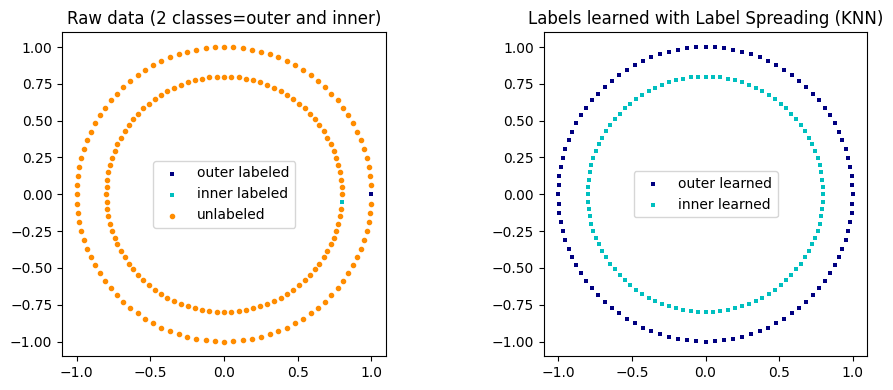

In [27]:
print('Taking referenece from sklearn label spread algo implemntaion in this page- ')
print(' https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-structure-py ')

import numpy as np
from sklearn.datasets import make_circles
from sklearn.semi_supervised import LabelSpreading
import matplotlib.pyplot as plt

# Generating synthetic data with two concentric circles
num_samples = 200
features, labels_true = make_circles(n_samples=num_samples, shuffle=False)
outer_class, inner_class = 0, 1

# Creating labels for the data, marking the first and last samples as outer and inner circles
all_labels = np.full(num_samples, -1.0)
all_labels[0] = outer_class
all_labels[-1] = inner_class

# Plotting the raw data with labeled and unlabeled points
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(
    features[all_labels == outer_class, 0],
    features[all_labels == outer_class, 1],
    color="navy",
    marker="s",
    lw=0,
    label="outer labeled",
    s=10,
)
plt.scatter(
    features[all_labels == inner_class, 0],
    features[all_labels == inner_class, 1],
    color="c",
    marker="s",
    lw=0,
    label="inner labeled",
    s=10,
)
plt.scatter(
    features[all_labels == -1, 0],
    features[all_labels == -1, 1],
    color="darkorange",
    marker=".",
    label="unlabeled",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
plt.title("Raw data (2 classes=outer and inner)")
plt.gca().set_aspect('equal', adjustable='box')  # Setting aspect ratio to be equal

# Applying Label Spreading algorithm
label_spread_model = LabelSpreading(kernel="knn", alpha=0.8)
label_spread_model.fit(features, all_labels)

# Plotting the labels learned with Label Spreading
output_labels = label_spread_model.transduction_
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer_class)[0]
inner_numbers = np.where(output_label_array == inner_class)[0]

plt.subplot(1, 2, 2)
plt.scatter(
    features[outer_numbers, 0],
    features[outer_numbers, 1],
    color="navy",
    marker="s",
    lw=0,
    s=10,
    label="outer learned",
)
plt.scatter(
    features[inner_numbers, 0],
    features[inner_numbers, 1],
    color="c",
    marker="s",
    lw=0,
    s=10,
    label="inner learned",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
plt.title("Labels learned with Label Spreading (KNN)")
plt.gca().set_aspect('equal', adjustable='box')  # Setting aspect ratio to be equal

plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()


Alternatively, here is my attempt to implement the label spread algo


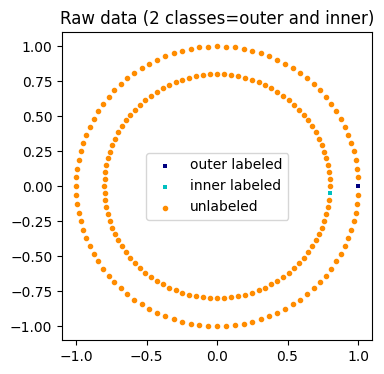

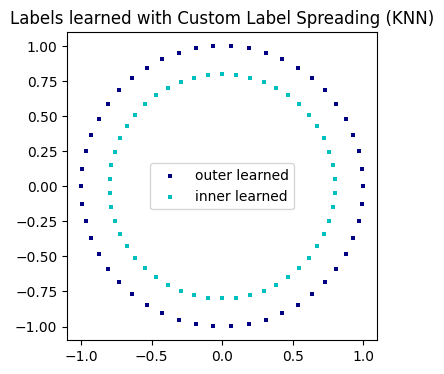

In [45]:
print('Alternatively, here is my attempt to implement the label spread algo')
# print('alpha=0.2, kernel='knn', n_neighbors=2, tol=1e-1, max_iter=500')

from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

class CustomLabelSpreading:
    def __init__(self, alpha=0.2, kernel='knn', n_neighbors=2, tol=1e-1, max_iter=500):
        self.alpha = alpha
        self.kernel = kernel
        self.n_neighbors = n_neighbors
        self.tol = tol
        self.max_iter = max_iter
        self.label_distributions_prev_ = None

    def fit(self, X, labels):
        self.X = np.asarray(X)
        self.labels = np.asarray(labels)
        self.n_samples, self.n_features = self.X.shape
        self.classes = np.unique(labels)
        self.n_classes = len(self.classes)

        # Create the graph Laplacian
        self.compute_laplacian()

        # Initialize the label distribution
        self.label_distributions_ = np.zeros((self.n_samples, self.n_classes))
        for label in self.classes:
            self.label_distributions_[self.labels == label, self.classes == label] = 1.0

        # Iterate until convergence or maximum iterations reached
        for i in range(self.max_iter):
            self.label_distributions_prev_ = np.copy(self.label_distributions_)

            self.label_distributions_ = (1 - self.alpha) * self.label_distributions_ + \
                self.alpha * np.dot(self.graph_laplacian, self.label_distributions_)

            # Check for convergence
            if np.sum(np.abs(self.label_distributions_ - self.label_distributions_prev_)) < self.tol:
                break

        # Assign the most probable label to each sample
        self.transduction_ = self.classes[np.argmax(self.label_distributions_, axis=1)]

    def compute_laplacian(self):
        if self.kernel == 'knn':
            self.graph_laplacian = self.compute_knn_laplacian()
        else:
            raise ValueError("Unsupported kernel: {}".format(self.kernel))

    def compute_knn_laplacian(self):
        distances = cdist(self.X, self.X)
        indices = np.argsort(distances, axis=1)[:, 1:self.n_neighbors+1]
        weights = np.exp(-distances[np.arange(self.n_samples)[:, None], indices]**2)
        laplacian = np.zeros((self.n_samples, self.n_samples))

        for i in range(self.n_samples):
            laplacian[i, indices[i]] = -weights[i]
            laplacian[i, i] = np.sum(weights[i])

        return laplacian

# Create raw data
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer
labels[-1] = inner

# Plot raw data
plt.figure(figsize=(4, 4))
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color="navy", marker="s", lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color="c", marker="s", lw=0, label="inner labeled", s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color="darkorange", marker=".", label="unlabeled")
plt.legend(scatterpoints=1, shadow=False, loc="center")
plt.title("Raw data (2 classes=outer and inner)")

# Use custom Label Spreading
label_spreading = CustomLabelSpreading(alpha=0.8, kernel='knn')
label_spreading.fit(X, labels)

# Plot results
output_labels = label_spreading.transduction_
outer_numbers = np.where(output_labels == outer)[0]
inner_numbers = np.where(output_labels == inner)[0]

plt.figure(figsize=(4, 4))
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color="navy", marker="s", lw=0, s=12, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color="c", marker="s", lw=0, s=12, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc="center")
plt.title("Labels learned with Custom Label Spreading (KNN)")

plt.show()


#Problem3

In [54]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score, confusion_matrix

# Load digit dataset
digit_data = datasets.load_digits()
random_generator = np.random.RandomState(0)
data_indices = np.arange(len(digit_data.data))
random_generator.shuffle(data_indices)

features = digit_data.data[data_indices[:330]]
labels = digit_data.target[data_indices[:330]]
images = digit_data.images[data_indices[:330]]
total_samples = len(labels)
labeled_points = 10

# Initialize LabelPropagation model
label_propagation_model = LabelPropagation(kernel='knn', n_neighbors=2, max_iter=1000)

for iteration in range(5):
    # Fit model with labeled data
    label_propagation_model.fit(features[:labeled_points], labels[:labeled_points])

    # Make predictions on all data (including unlabeled)
    predicted_labels = label_propagation_model.predict(features)

    # Evaluate model performance
    accuracy = accuracy_score(labels, predicted_labels)
    confusion_matrix_result = confusion_matrix(labels, predicted_labels)

    print(f"Iteration {iteration + 1} - Labeled Points: {labeled_points}")
    print(f"Accuracy: {accuracy:.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix_result)

    # Select the top 5 most confident points to label
    confidence_scores = label_propagation_model.predict_proba(features)
    top_confident_indices = np.argsort(np.max(confidence_scores, axis=1))[-5:]

    # Add the confident points to the labeled set
    labeled_features = features[:labeled_points]
    labeled_labels = labels[:labeled_points]
    labeled_features = np.concatenate((labeled_features, features[top_confident_indices]))
    labeled_labels = np.concatenate((labeled_labels, predicted_labels[top_confident_indices]))

    # Increase the number of labeled points for the next iteration
    labeled_points += 5

    print("\n")
print('Observation- Accuracy keeps on increasing in each iteration and will further continue to enhance if we keep iterating for a few more iterations')


Iteration 1 - Labeled Points: 10
Accuracy: 0.403
Confusion Matrix:
[[ 0  0  0  0  0  2 22  0  0  0]
 [ 0 27  2  0  0  1  0  0  0  0]
 [ 0  2 31  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  1 13  0]
 [ 0  8  0  0  0  1 18  0  0  0]
 [ 0  0  0  0  0 19  7  0 10  0]
 [ 0 10  0  0  0  0 32  0  0  0]
 [ 0  6  4  0  0 21  0  6  0  0]
 [ 0  9  2  0  0  1  3  2 18  0]
 [ 0  1  6  0  0  2  1  3 25  0]]


Iteration 2 - Labeled Points: 15
Accuracy: 0.464
Confusion Matrix:
[[ 0  0  0  0  0  0 23  0  1  0]
 [ 0 24  2  0  0  0  4  0  0  0]
 [ 0  2 31  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  1 13  0]
 [ 0  6  0  0  0  0 18  3  0  0]
 [ 0  0  0  0  0 19  7  0 10  0]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  5  1  0  0 12  1 18  0  0]
 [ 0  4  2  0  0  0  6  3 20  0]
 [ 0  1  5  0  0  2  6  1 23  0]]


Iteration 3 - Labeled Points: 20
Accuracy: 0.576
Confusion Matrix:
[[24  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  4  0  0  0]
 [ 3  2 28  0  0  0  0  0  0  0]
 [ 1  0 12  0  0  0  0  1 14  0]
 

#Problem 4

In [ ]:
!pip install torch

In [ ]:
!python /content/layers.py

In [ ]:
!python /content/__init__.py

In [ ]:
!python /content/models.py

In [ ]:
!python /content/utils.py

In [58]:
import numpy as np
import scipy.sparse as sp
import torch


def encode_onehot(labels):
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in
                    enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)),
                             dtype=np.int32)
    return labels_onehot


def load_data(path="/content/cora/", dataset="cora"):
    """Load citation network dataset (cora only for now)"""
    print('Loading {} dataset...'.format(dataset))

    idx_features_labels = np.genfromtxt("{}{}.content".format(path, dataset),
                                        dtype=np.dtype(str))
    features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
    labels = encode_onehot(idx_features_labels[:, -1])

    # build graph
    idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt("{}{}.cites".format(path, dataset),
                                    dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(labels.shape[0], labels.shape[0]),
                        dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

    features = normalize(features)
    adj = normalize(adj + sp.eye(adj.shape[0]))

    idx_train = range(140)
    idx_val = range(200, 500)
    idx_test = range(500, 1500)

    features = torch.FloatTensor(np.array(features.todense()))
    labels = torch.LongTensor(np.where(labels)[1])
    adj = sparse_mx_to_torch_sparse_tensor(adj)

    idx_train = torch.LongTensor(idx_train)
    idx_val = torch.LongTensor(idx_val)
    idx_test = torch.LongTensor(idx_test)

    return adj, features, labels, idx_train, idx_val, idx_test


def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)


In [59]:
import math

import torch

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'


In [60]:
import torch.nn as nn
import torch.nn.functional as F
# from layers import GraphConvolution


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return F.log_softmax(x, dim=1)


In [65]:
# from _future_ import division
# from _future_ import print_function

import time
import argparse
import numpy as np
import os  # Added import for os module

import torch
import torch.nn.functional as F
import torch.optim as optim

# from pygcn.utils import load_data, accuracy
# from pygcn.models import GCN


import torch.nn as nn
import torch.nn.functional as F
# from layers import GraphConvolution
import numpy as np
import scipy.sparse as sp
import torch


def encode_onehot(labels):
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in
                    enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)),
                             dtype=np.int32)
    return labels_onehot


def load_data(path="/content/cora/", dataset="cora"):
    """Load citation network dataset (cora only for now)"""
    print('Loading {} dataset...'.format(dataset))

    idx_features_labels = np.genfromtxt("{}{}.content".format(path, dataset),
                                        dtype=np.dtype(str))
    features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
    labels = encode_onehot(idx_features_labels[:, -1])

    # build graph
    idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt("{}{}.cites".format(path, dataset),
                                    dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(labels.shape[0], labels.shape[0]),
                        dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

    features = normalize(features)
    adj = normalize(adj + sp.eye(adj.shape[0]))

    idx_train = range(140)
    idx_val = range(200, 500)
    idx_test = range(500, 1500)

    features = torch.FloatTensor(np.array(features.todense()))
    labels = torch.LongTensor(np.where(labels)[1])
    adj = sparse_mx_to_torch_sparse_tensor(adj)

    idx_train = torch.LongTensor(idx_train)
    idx_val = torch.LongTensor(idx_val)
    idx_test = torch.LongTensor(idx_test)

    return adj, features, labels, idx_train, idx_val, idx_test


def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return F.log_softmax(x, dim=1)

# Set the training settings
class Args:
    def __init__(self):
        self.no_cuda = False  # Set to True if we want to disable CUDA
        self.fastmode = False
        self.seed = 42
        self.epochs = 200
        self.lr = 0.01
        self.weight_decay = 5e-4
        self.hidden = 16
        self.dropout = 0.5

args = Args()
args.cuda = not args.no_cuda and torch.cuda.is_available()

np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

# Specify the data directory
data_dir = '/content/pygcn-cora/'

# Load data
adj, features, labels, _, idx_val, idx_test = load_data(data_dir)

# Model and optimizer
model = GCN(nfeat=features.shape[1],
            nhid=args.hidden,
            nclass=labels.max().item() + 1,
            dropout=args.dropout)
optimizer = optim.Adam(model.parameters(),
                       lr=args.lr, weight_decay=args.weight_decay)

if args.cuda:
    model.cuda()
    features = features.cuda()
    adj = adj.cuda()
    labels = labels.cuda()
    idx_val = idx_val.cuda()
    idx_test = idx_test.cuda()

# Define a list of labeled node counts
# number of labeled nodes to be 60, 120, 180, 240, 300, respectively.
number_of_labeled_node = [60, 120, 180, 240, 300]

for labeled_nodes_count in number_of_labeled_node:
    # Randomly choose labeled nodes
    idx_train = np.random.choice(idx_val, labeled_nodes_count, replace=False)

    def train(epoch):
        t = time.time()
        model.train()
        optimizer.zero_grad()
        output = model(features, adj)
        loss_train = F.nll_loss(output[idx_train], labels[idx_train])
        acc_train = accuracy(output[idx_train], labels[idx_train])
        loss_train.backward()
        optimizer.step()

        if not args.fastmode:
            # Evaluate validation set performance separately,
            # deactivates dropout during the validation run.
            model.eval()
            output = model(features, adj)

        loss_val = F.nll_loss(output[idx_val], labels[idx_val])
        acc_val = accuracy(output[idx_val], labels[idx_val])
        print('Epoch: {:04d}'.format(epoch + 1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'acc_train: {:.4f}'.format(acc_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'acc_val: {:.4f}'.format(acc_val.item()),
              'time: {:.4f}s'.format(time.time() - t))

    def test():
        model.eval()
        output = model(features, adj)
        loss_test = F.nll_loss(output[idx_test], labels[idx_test])
        acc_test = accuracy(output[idx_test], labels[idx_test])
        print("Test set results:",
              "loss= {:.4f}".format(loss_test.item()),
              "accuracy= {:.4f}".format(acc_test.item()))

    # Train model
    t_total = time.time()
    for epoch in range(args.epochs):
        train(epoch)
    print(f"After Completion of {labeled_nodes_count} labeled nodes")
    print("Time taken: {:.4f}s".format(time.time() - t_total))

    # Testing
    test()

Loading cora dataset...
Epoch: 0001 loss_train: 1.9300 acc_train: 0.1833 loss_val: 1.9391 acc_val: 0.1567 time: 0.0209s
Epoch: 0002 loss_train: 1.9134 acc_train: 0.1667 loss_val: 1.9296 acc_val: 0.1567 time: 0.0181s
Epoch: 0003 loss_train: 1.9184 acc_train: 0.1833 loss_val: 1.9210 acc_val: 0.1567 time: 0.0193s
Epoch: 0004 loss_train: 1.9068 acc_train: 0.1833 loss_val: 1.9130 acc_val: 0.1567 time: 0.0192s
Epoch: 0005 loss_train: 1.8951 acc_train: 0.1833 loss_val: 1.9055 acc_val: 0.1567 time: 0.0201s
Epoch: 0006 loss_train: 1.8739 acc_train: 0.1667 loss_val: 1.8980 acc_val: 0.1567 time: 0.0192s
Epoch: 0007 loss_train: 1.8617 acc_train: 0.2000 loss_val: 1.8906 acc_val: 0.1567 time: 0.0184s
Epoch: 0008 loss_train: 1.8726 acc_train: 0.1833 loss_val: 1.8830 acc_val: 0.1567 time: 0.0195s
Epoch: 0009 loss_train: 1.8645 acc_train: 0.2000 loss_val: 1.8752 acc_val: 0.1667 time: 0.0194s
Epoch: 0010 loss_train: 1.8540 acc_train: 0.2500 loss_val: 1.8676 acc_val: 0.3200 time: 0.0189s
Epoch: 0011 loss

Observation-

After Completion of 60 labeled nodes
Time taken: 4.5737s
Test set results: loss= 0.8145 accuracy= 0.7500

After Completion of 180 labeled nodes
Time taken: 4.5642s
Test set results: loss= 0.6646 accuracy= 0.7870

After Completion of 120 labeled nodes
Time taken: 5.2855s
Test set results: loss= 0.7413 accuracy= 0.7860

After Completion of 240 labeled nodes
Time taken: 4.3290s
Test set results: loss= 0.5481 accuracy= 0.8230

After Completion of 300 labeled nodes
Time taken: 5.1353s
Test set results: loss= 0.5274 accuracy= 0.8320